# Resource System Ordering Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import csv
import glob
import os

## Experiment Config

In [2]:
def create_folder(folder):
    if not os.path.exists(f'figs/{folder}'):
        os.mkdir(f'figs/{folder}')  
        print("Directory '% s' created" % folder)

In [3]:
# Parameters configuration
task = 'fullrank'
metric =  'ndcg_cut_10' # 'map' or 'ndcg_cut_1000'

# create plots folder
# create_folder(folder=metric)

# This snipp code should be updated later.
if '_' in metric:
    cut_off = metric.split('_')[2] # '1000'
    plot_metric = metric.split('_')[0].upper()
    plot_metric = plot_metric + '@' + cut_off
else:
    cut_off = ''
    plot_metric = metric.upper()

print(plot_metric)

NDCG@10


In [4]:
# version = 'final'
result_format = 'ndcgeval' # 'treceval' or 'ndcgeval'
# File path
metadata_file = '../metadata'
# year = "DL-20"
year = "2023"
dl_year = "dl"+year

In [42]:
# TREC DL Past Years
nist_qrel_file = f"{dl_year}/{year}qrels-pass.txt"
full_nist_result_file = f'all.pass.{dl_year}.{result_format}'
full_resource_result_file = f'all.pass.{dl_year}.resource-gpt4-v2.{result_format}'

## Loading metadata
Loading the metadata file to create a dictionary of runid to subtask, loading the metadata_models file to have the pipeline structure, adding the subtask info to metadata models dataframe

In [22]:
runid_to_subtasks = dict()
with open(metadata_file, 'rt', encoding = 'utf8') as f:
    reader = csv.reader(f, delimiter = ':')
    for [runid, group, _, _, _, _, maintask, _, subtask, _, _, _, _, model, _, _, _, _] in reader:
        runid_to_subtasks[runid] = subtask.split('-')[0]

In [23]:
# loading metadeta infomrmaiton for runs, we have the type of pipeline as a metadata here
metadata_models_df = pd.read_csv('../metadata_models.csv', sep="\t")
metadata_models_df.head()

,run_id,LLM,pipeline
0,colbertv2,-,Colbert-v2 and using pre-trained checkpoint an...
1,cip_run_7,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...
2,cip_run_1,MonoT5/GPT-3.5/GPT-4,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...
3,cip_run_2,MonoT5/GPT-3.5/GPT-4,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...
4,cip_run_3,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...


In [24]:
metadata_models_df['subtask'] = metadata_models_df['run_id'].map(runid_to_subtasks)
metadata_models_df.head(60)

,run_id,LLM,pipeline,subtask
0,colbertv2,-,Colbert-v2 and using pre-trained checkpoint an...,fullrank
1,cip_run_7,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
2,cip_run_1,MonoT5/GPT-3.5/GPT-4,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
3,cip_run_2,MonoT5/GPT-3.5/GPT-4,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
4,cip_run_3,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
5,cip_run_4,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
6,cip_run_5,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
7,cip_run_6,MonoT5/GPT-3.5,Unicoil+doct5query (pyserini)%0A2. MonoT5-3b (...,fullrank
8,agg-cocondenser,-,Aggretriever is a dense retriever with semanti...,fullrank
9,slim-pp-0shot-uw,-,SPRINT-https%3A//arxiv.org/pdf/2302.06587.pdf-...,fullrank


## Loading System Performance based on NIST Qrel

In [43]:
nist_qrels = pd.read_csv(nist_qrel_file, sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])

queries_judged = set(nist_qrels['qid'])

real_queries_judged = [x for x in queries_judged if x < 3000000]
t5_queries_judged = [x for x in queries_judged if x > 3000000 and x < 3100000]
gpt4_queries_judged = [x for x in queries_judged if x > 3100000]

print('queries_judged', len(queries_judged))
print('real_queries_judged', len(real_queries_judged))
print('t5_queries_judged', len(t5_queries_judged))
print('gpt4_queries_judged', len(gpt4_queries_judged))

queries_judged 82
real_queries_judged 51
t5_queries_judged 13
gpt4_queries_judged 18


In [14]:
print(len(nist_qrels['rel']))
print(len([x for x in nist_qrels['rel'] if x == 0]))
print(len([x for x in nist_qrels['rel'] if x == 1]))
print(len([x for x in nist_qrels['rel'] if x == 2]))
print(len([x for x in nist_qrels['rel'] if x == 3]))

22327
13866
4372
2259
1830


In [15]:
dl23_qrels = pd.read_csv("dl2023/2023qrels-pass.txt", sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
dl22_qrels = pd.read_csv("dl2022/2022qrels-pass.txt", sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
dl21_qrels = pd.read_csv("dl2021/2021qrels-pass.txt", sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
dl20_qrels = pd.read_csv("dl2020/2020qrels-pass.txt", sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
dl19_qrels = pd.read_csv("dl2019/2019qrels-pass.txt", sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])

### Loading runs ndcgecal on NIST qrels 

In [48]:
# TREC DL 2019
nist_labels_result = pd.read_csv(full_nist_result_file, sep='\t', header=None, names=['run_id', 'metric', 'qid', 'score'])
nist_labels_result = nist_labels_result[nist_labels_result['qid'] != 'all']
nist_labels_result['qid'] = nist_labels_result['qid'].astype(int)
nist_labels_result = nist_labels_result[(nist_labels_result['metric'] == metric)]
nist_labels_result['score'] = nist_labels_result['score'].astype('float64')

track_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric)].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
track_queries_nist_labels = track_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_track_nist = dict(zip(track_queries_nist_labels['run_id'], track_queries_nist_labels[metric]))

In [49]:
full_nist_result_file

'all.pass.dl2023.ndcgeval'

In [50]:
nist_labels_result

,run_id,metric,qid,score
0,cip_run_7 Rndcg,2001010,0.6321,NaN
1,cip_run_7 ndcg_cut_5,2001010,1.0000,NaN
2,cip_run_7 ndcg_cut_10,2001010,0.8563,NaN
3,cip_run_7 ndcg_cut_15,2001010,0.8769,NaN
4,cip_run_7 ndcg_cut_20,2001010,0.9080,NaN
...,...,...,...,...
29045,uogtr_b_grf_e_gb ndcg_cut_30,all,0.4809,NaN
29046,uogtr_b_grf_e_gb ndcg_cut_100,all,0.4386,NaN
29047,uogtr_b_grf_e_gb ndcg_cut_200,all,0.4117,NaN
29048,uogtr_b_grf_e_gb ndcg_cut_500,all,0.4081,NaN


In [45]:
runid_to_score_track_nist

{}

### TREC DL 2023

In [54]:
nist_labels_result = pd.read_csv(full_nist_result_file, sep='\t', header=None, names=['runid_metric', 'qid', 'score'])
nist_labels_result['runid_metric'] = nist_labels_result['runid_metric'].str.strip()
nist_labels_result[['run_id', 'metric']] = nist_labels_result['runid_metric'].str.split(' ', expand=True)
nist_labels_result = nist_labels_result.drop('runid_metric', axis=1)

nist_labels_result = nist_labels_result[nist_labels_result['qid'] != 'all']
nist_labels_result['qid'] = nist_labels_result['qid'].astype(int)
nist_labels_result = nist_labels_result[(nist_labels_result['metric'] == metric)]
nist_labels_result['score'] = nist_labels_result['score'].astype('float64')

In [55]:
nist_labels_result

,qid,score,run_id,metric
2,2001010,0.8563,cip_run_7,ndcg_cut_10
12,2001459,0.6551,cip_run_7,ndcg_cut_10
22,2001575,0.3321,cip_run_7,ndcg_cut_10
32,2002075,0.8087,cip_run_7,ndcg_cut_10
42,2002168,0.6691,cip_run_7,ndcg_cut_10
...,...,...,...,...
28992,3100825,0.5348,uogtr_b_grf_e_gb,ndcg_cut_10
29002,3100833,0.4907,uogtr_b_grf_e_gb,ndcg_cut_10
29012,3100909,0.9511,uogtr_b_grf_e_gb,ndcg_cut_10
29022,3100918,0.6336,uogtr_b_grf_e_gb,ndcg_cut_10


In [56]:
track_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & (nist_labels_result['qid'].isin(queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
track_queries_nist_labels = track_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_track_nist = dict(zip(track_queries_nist_labels['run_id'], track_queries_nist_labels[metric]))

In [ ]:
# removing the runs that are for reranking task (4 runs for reranking) -> 39 runs will be remain
included_runids = metadata_models_df[metadata_models_df['subtask'] == task]['run_id']
print(len(set(included_runids)))

# We have {'D_bm25_splades', 'D_naverloo-frgpt4', 'D_naverloo_bm25_RR', 'D_naverloo_bm_splade_RR', 'colbertv2'}
# runs that have not submitted their results. So, we have 40 run_ids in metadata file in total, the rerank ones (4 runs) 
# are rmeoved from the list using the above command. Then, 36 runs we have, in whiche 5 submissions are have not submitteed their reuslt
# so we will have 31 submissions in total.

nist_labels_result = nist_labels_result[nist_labels_result['run_id'].isin(included_runids)]
print(len(set(nist_labels_result['run_id'])))

nist_labels_result = nist_labels_result[nist_labels_result['qid'] != 'all']
nist_labels_result['qid'] = nist_labels_result['qid'].astype(int)
nist_labels_result = nist_labels_result[(nist_labels_result['metric'] == metric)]
nist_labels_result['score'] = nist_labels_result['score'].astype('float64')

In [ ]:
track_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & (nist_labels_result['qid'].isin(queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
track_queries_nist_labels = track_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_track_nist = dict(zip(track_queries_nist_labels['run_id'], track_queries_nist_labels[metric]))

generated_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & ((nist_labels_result['qid'].isin(t5_queries_judged)) | ((nist_labels_result['qid'].isin(gpt4_queries_judged)))) ].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
generated_queries_nist_labels = generated_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_generated_nist = dict(zip(generated_queries_nist_labels['run_id'], generated_queries_nist_labels[metric]))

real_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & (nist_labels_result['qid'].isin(real_queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
real_queries_nist_labels = real_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_real_nist = dict(zip(real_queries_nist_labels['run_id'], real_queries_nist_labels[metric]))

t5_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & (nist_labels_result['qid'].isin(t5_queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
t5_queries_nist_labels = t5_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_t5_nist = dict(zip(t5_queries_nist_labels['run_id'], t5_queries_nist_labels[metric]))

gpt4_queries_nist_labels = nist_labels_result[(nist_labels_result['metric'] == metric) & (nist_labels_result['qid'].isin(gpt4_queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
gpt4_queries_nist_labels = gpt4_queries_nist_labels.rename(columns={'mean':metric})
runid_to_score_gpt4_nist = dict(zip(gpt4_queries_nist_labels['run_id'], gpt4_queries_nist_labels[metric]))

### Loading runs ndcgecal on Resource qrels 

In [25]:
gpt4_labels_result = pd.read_csv(full_resource_result_file, sep='\t', header=None, names=['run_id', 'metric', 'qid', 'score'])
gpt4_labels_result.head()

gpt4_labels_result = gpt4_labels_result[gpt4_labels_result['qid'] != 'all']
gpt4_labels_result['qid'] = gpt4_labels_result['qid'].astype(int)
gpt4_labels_result = gpt4_labels_result[(gpt4_labels_result['metric'] == metric)]
gpt4_labels_result['score'] = gpt4_labels_result['score'].astype('float64')

track_queries_gpt4_labels = gpt4_labels_result[(gpt4_labels_result['metric'] == metric)].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
track_queries_gpt4_labels = track_queries_gpt4_labels.rename(columns={'mean':metric})
runid_to_score_track_gpt4 = dict(zip(track_queries_gpt4_labels['run_id'], track_queries_gpt4_labels[metric]))

### Loading Configs

In [26]:
# loading the metadata and assigning LLM tag based on the pipeline of each run
run_to_model = {}
# red: gpt, yellow: t5, orange: gpt+t5, and blue: everything else
for eachline in metadata_models_df.itertuples(index=True):
    # if we have both T5 and GPT version in the pipeline
    if 'T5' in eachline.LLM and 'GPT' in eachline.LLM:
        run_to_model[eachline.run_id] = 'GPT+T5'
    elif 'GPT' in eachline.LLM:
        run_to_model[eachline.run_id] = 'GPT'
    elif 'T5' in eachline.LLM:
        run_to_model[eachline.run_id] = 'T5'
    else:
        run_to_model[eachline.run_id] = 'Others'

In [27]:
def get_merged_df(dict_1, dict_2):

    # Convert dictionaries to DataFrames
    df1 = pd.DataFrame(list(dict_1.items()), columns=['Key', 'Value1'])
    df2 = pd.DataFrame(list(dict_2.items()), columns=['Key', 'Value2'])

    # Merge the DataFrames based on the 'Key' column
    merged_df = pd.merge(df1, df2, on='Key', how='outer')

    return merged_df

In [28]:
model_to_color = {'GPT': 'red', 'T5': 'brown', 'GPT+T5': 'orange', 'Others': 'green'}
model_to_marker = {'GPT': 'x', 'T5': '|', 'GPT+T5': '+', 'Others': '.'}

## 3. Generating Plots for Various Types of Analysis

In [61]:
def get_plot(x_avg_scores, y_avg_scores, query_types=['track', 'real'], label_types=['NIST', 'NIST']):

    # splitting query types
    query_type_x = query_types[0]
    query_type_y = query_types[1]

    # splitting query types
    label_type_x = label_types[0]
    label_type_y = label_types[1]

    # if label_type_x == 'Sparse':
    #     metric_type_x = f"NDCG@{cut_off}"
    # else:
    #     metric_type_x = f"NDCG@{cut_off}"

    # if label_type_y == 'Sparse':
    #     metric_type_y = f"NDCG@{cut_off}"
    # else:
    #     metric_type_y = f"NDCG@{cut_off}"

    merged_df = get_merged_df(x_avg_scores, y_avg_scores)

    for eachline in merged_df.itertuples(index=True):
        run_model = run_to_model[eachline.Key]
        model_color = model_to_color[run_model]
        model_marker = model_to_marker[run_model]
        plt.scatter(eachline.Value1, eachline.Value2, c=f"{model_color}", marker=f"{model_marker}", label=f"{run_model}", s=70)

    if label_type_x != 'Sparse' and label_type_y != 'Sparse':
        # axes
        ax = plt.gca()
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
            ]
        
        # now plot both limits against eachother
        ax.plot(lims, lims, color='blue', linestyle='dashed', linewidth=0.7)
    
    tau, p_value = stats.kendalltau(merged_df['Value1'], merged_df['Value2'])

    #adding tau inside the plot 
    plt.annotate(r'Kendall $\tau$ = %s' %np.round(tau, 4), xy=(0.03, 0.61), xycoords='axes fraction', fontsize=14)
    
    # plt.xlabel(f'{metric_type_x} on {query_type_x} queries ({label_type_x} Qrel)', fontsize=10)
    # plt.ylabel(f'{metric_type_y} on {query_type_y} queries ({label_type_y} Qrel)', fontsize=10)

    # plt.xlabel(f'{plot_metric} ({query_type_x}, {label_type_x} Judgments)', fontsize=13)
    # plt.ylabel(f'{plot_metric} ({query_type_y}, {label_type_y} Judgments)', fontsize=13)

    plt.xlabel(f'{plot_metric} ({query_type_x})', fontsize=16)
    plt.ylabel(f'{plot_metric} ({query_type_y})', fontsize=16)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), edgecolor='black', fontsize=13)

    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    # plt.show()

    plt.savefig(f"figs/{dl_year}/{dl_year}_{plot_metric}_colored.pdf", bbox_inches='tight')

In [30]:
def get_plot_simple(x_avg_scores, y_avg_scores, query_types=['track', 'real'], label_types=['NIST', 'NIST']):

    # splitting query types
    query_type_x = query_types[0]
    query_type_y = query_types[1]

    # splitting query types
    label_type_x = label_types[0]
    label_type_y = label_types[1]

    merged_df = get_merged_df(x_avg_scores, y_avg_scores)

    for eachline in merged_df.itertuples(index=True):
        plt.scatter(eachline.Value1, eachline.Value2, c='black')

    ax = plt.gca()
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
        
    # now plot both limits against eachother
    ax.plot(lims, lims, color='black', linestyle='dashed', linewidth=0.7)
    
    tau, p_value = stats.kendalltau(merged_df['Value1'], merged_df['Value2'])

    #adding tau inside the plot 
    plt.annotate(r'Kendall $\tau$ = %s' %np.round(tau, 4), xy=(0.03, 0.7), xycoords='axes fraction', fontsize=16)

    plt.xlabel(f'{plot_metric} ({query_type_x})', fontsize=16)
    plt.ylabel(f'{plot_metric} ({query_type_y})', fontsize=16)

    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.show()

    # plt.savefig(f"figs/{dl_year}/{dl_year}_{plot_metric}.pdf", bbox_inches='tight')

In [31]:
dl_year

'dl2023'

### 3.1 Generating Query Analysis Plots (Synthetic Query Analysis -- NIST Qrels)

In [ ]:
# track-full-nist vs. track-sample-nist
get_plot_simple(runid_to_score_track_nist, runid_to_score_track_gpt4, query_types=['DL-20', 'DL-LLM'], label_types=['Human', 'GPT-4'])

In [36]:
runid_to_score_track_gpt4

{'WatS-Augmented-BM25': 0.5065996763754045,
 'WatS-LLM-Rerank': 0.6531334951456311,
 'agg-cocondenser': 0.6947640776699029,
 'bm25_splades': 0.7374799352750809,
 'cip_run_1': 0.8671033980582524,
 'cip_run_2': 0.8671084142394823,
 'cip_run_3': 0.8419244336569579,
 'cip_run_4': 0.8322297734627832,
 'cip_run_5': 0.8344017799352751,
 'cip_run_6': 0.8269459546925566,
 'cip_run_7': 0.8352076051779936,
 'naverloo-frgpt4': 0.9006967637540453,
 'naverloo-rgpt4': 0.906021359223301,
 'naverloo_bm25_RR': 0.7944656957928803,
 'naverloo_bm25_splades_RR': 0.8337873786407768,
 'naverloo_fs': 0.7513868932038835,
 'naverloo_fs_RR': 0.8335588996763754,
 'naverloo_fs_RR_duo': 0.8848582524271844,
 'slim-pp-0shot-uw': 0.6974257281553398,
 'splade_pp_ensemble_distil': 0.7315275080906148,
 'splade_pp_self_distil': 0.7389996763754045,
 'uogtr_b_grf_e': 0.749215210355987,
 'uogtr_b_grf_e_gb': 0.7670847896440129,
 'uogtr_be': 0.7556422330097087,
 'uogtr_be_gb': 0.7659852750809061,
 'uogtr_dph': 0.527832524271844

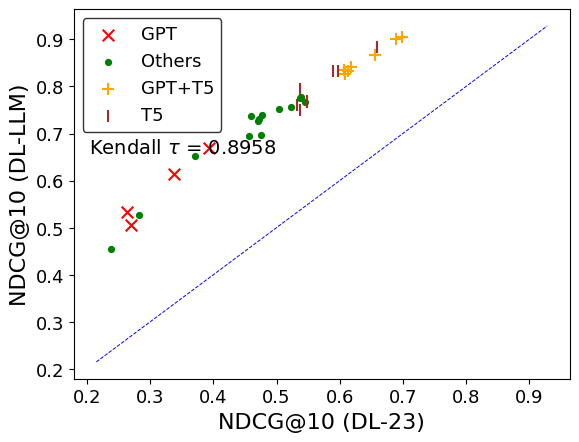

In [62]:
get_plot(runid_to_score_track_nist, runid_to_score_track_gpt4, query_types=['DL-23', 'DL-LLM'], label_types=['Human', 'GPT-4'])

### Generating Scatter Plots for Sparse Qrels

In [ ]:
run_df_list = []
for infile in glob.glob(sparse_result_file):
    run_df = pd.read_csv(infile, sep='\t', header=None, names=['metric', 'qid', 'score'])
    run_id_name = os.path.basename(infile).split('.')[0]
    run_df['run_id'] = run_id_name
    run_df = run_df[run_df['qid'] != 'all']
    run_df['score'] = run_df['score'].astype(float)
    run_df['qid'] = run_df['qid'].astype(int)
    run_df['metric'] = run_df['metric'].apply(lambda x: x.rstrip())
    run_df_list.append(run_df)
 
sparse_labels_ndcgeval = pd.concat(run_df_list)
sparse_labels_ndcgeval

In [ ]:
sparse_labels_ndcgeval = sparse_labels_ndcgeval[sparse_labels_ndcgeval['run_id'].isin(included_runids)]
print(len(set(sparse_labels_ndcgeval['run_id'])))

In [ ]:
len(sparse_labels_ndcgeval['qid'].unique())

In [ ]:
my_metric = metric # 'recip_rank'

In [ ]:
print("All synthetic (generated) queries")
metric_df = sparse_labels_ndcgeval[sparse_labels_ndcgeval['metric'] == my_metric].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean': my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_generated_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

In [ ]:
sparse_labels_ndcgeval

In [ ]:
print("T5 kept by NIST when judging:")
metric_df = sparse_labels_ndcgeval[(sparse_labels_ndcgeval['metric'] == my_metric) & (sparse_labels_ndcgeval['qid'].isin(t5_queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean':my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_t5nist_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

In [ ]:
print("GPT-4 kept by NIST when judging:")
metric_df = sparse_labels_ndcgeval[(sparse_labels_ndcgeval['metric'] == my_metric) & (sparse_labels_ndcgeval['qid'].isin(gpt4_queries_judged))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean':my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_gpt4nist_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

In [ ]:
print("Generated kept by NIST when judging:")
metric_df = sparse_labels_ndcgeval[(sparse_labels_ndcgeval['metric'] == my_metric) & ((sparse_labels_ndcgeval['qid'].isin(gpt4_queries_judged)) | (sparse_labels_ndcgeval['qid'].isin(t5_queries_judged)))].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean': my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_gpt4Xt5nist_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

In [ ]:
print('All T5 queries')
metric_df = sparse_labels_ndcgeval[(sparse_labels_ndcgeval['metric'] == my_metric) & (sparse_labels_ndcgeval['qid'] < 3100000)].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean':my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_t5_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

In [ ]:
print('All GPT-4 queries')
metric_df = sparse_labels_ndcgeval[(sparse_labels_ndcgeval['metric'] == my_metric) & (sparse_labels_ndcgeval['qid'] >= 3100000)].groupby('run_id')['score'].agg(['mean', 'count']).reset_index()
metric_df = metric_df.rename(columns={'mean':my_metric})
metric_df.sort_values(my_metric, ascending=False)
runid_to_score_gpt4_sparse = dict(zip(metric_df.run_id, metric_df[my_metric]))

### NDCG@10

In [ ]:
# t5-nist vs. all_t5-sparse
# get_plot(runid_to_score_real_nist, runid_to_score_gpt4Xt5nist_sparse, query_types=['Real', 'GeneratedxNIST'], label_types=['NIST', 'Sparse'])

In [ ]:
# t5-nist vs. all_t5-sparse
# get_plot(runid_to_score_t5_nist, runid_to_score_t5_sparse, query_types=['T5', 'T5'], label_types=['NIST', 'Sparse'])

In [ ]:
# gpt4-nist vs. all_gpt4-sparse
# get_plot(runid_to_score_gpt4_nist, runid_to_score_gpt4_sparse, query_types=['GPT-4', 'GPT-4'], label_types=['NIST', 'Sparse'])

In [ ]:
# real-nist vs. generated-sparse
get_plot_simple(runid_to_score_real_nist, runid_to_score_generated_sparse, query_types=['Real', 'Synthetic'], label_types=['Human', 'Sparse'])

In [ ]:
# real-nist vs. judged-generated-sparse
# get_plot_simple(runid_to_score_real_nist, runid_to_score_gpt4Xt5nist_sparse, query_types=['Real', 'JudgedSynthetic'], label_types=['Human', 'Sparse'])

In [ ]:
# generated-nist vs. generated-sparse
# get_plot(runid_to_score_generated_nist, runid_to_score_generated_sparse, query_types=['Generated', 'Generated'], label_types=['NIST', 'Sparse'])

In [ ]:
# t5-nist vs. t5nist-sparse
# get_plot(runid_to_score_t5_nist, runid_to_score_t5nist_sparse, query_types=['T5', 'T5 Judged by NIST'], label_types=['NIST', 'Sparse'])

In [ ]:
# gpt4-nist vs. gpt4nist-sparse
# get_plot(runid_to_score_gpt4_nist, runid_to_score_gpt4nist_sparse, query_types=['GPT-4', 'GPT-4 Judged by NIST'], label_types=['NIST', 'Sparse'])

### Runs Overall Results

In [ ]:
dl2023_full_qrel_results = pd.read_csv("all.pass.dl23.resource-gpt4.treceval", sep='\t', header=None, names=['run_id', 'metric', 'qid', 'score'])
dl2023_full_qrel_results.head()

In [ ]:
dl2023_full_qrel_results = dl2023_full_qrel_results[dl2023_full_qrel_results["qid"]=="all"]

In [ ]:
dl2023_full_qrel_results[dl2023_full_qrel_results["metric"] == "map"].sort_values("score")